In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
rl = pd.read_csv('~/Dropbox/maxgradient/Revelio/April2021OutAthenaRevelio.csv')
rl.head()

,company,month,ai_sum,ai_in,ai_out,cloud_sum,cloud_in,cloud_out,datascience_sum,datascience_in,...,naics_code,naics_description,cik,lei,agg_sml,agg_obs,agg_reorg,agg_rcog,agg_rman,agg_tele
0,Heron Therapeutics Inc,2017-11,NaN,NaN,NaN,5.410117,0.000004,6.343190e-06,15.267342,0.000014,...,NaN,NaN,NaN,NaN,2.853931,3.765711,4.452304,0.438269,-0.197353,0.326394
1,Heron Therapeutics Inc,2019-07,NaN,NaN,NaN,9.122784,0.001616,1.999217e-03,22.516964,0.004570,...,NaN,NaN,NaN,NaN,2.843072,3.797250,4.475587,0.415692,-0.253425,0.360833
2,Hersha Hospitality Trust,2013-05,20.114271,0.000841,5.234667e-17,20.901424,0.000564,1.011018e-16,93.818050,5.160012,...,NaN,NaN,NaN,NaN,3.167813,3.543795,4.661072,0.124741,0.200943,0.084058
3,Hershey Company,2016-05,10.557860,0.019948,2.484005e-03,224.555560,14.787168,3.051606e+00,360.706730,33.671440,...,NaN,NaN,NaN,NaN,2.964091,3.685215,4.402210,0.192888,0.284075,0.282566
4,"Hertz Global Holdings, Inc.",2012-09,38.808353,0.189519,3.782879e+00,810.401500,22.724280,1.023404e+01,631.888400,22.045147,...,NaN,NaN,NaN,NaN,2.975635,3.729125,4.386020,0.581415,0.010646,0.321238


In [3]:
dict(zip(list(rl[rl.exchange.isin(['Paris Stock Exchange','NYSE Euronext - Euronext Paris'])].company.unique()),
list(rl[rl.exchange.isin(['Paris Stock Exchange','NYSE Euronext - Euronext Paris'])].ticker.unique())))

{'Ipsen SA': 'IPN',
 'Mercialys SA': 'MERY',
 'CGG SA': 'CGG',
 'Etablissements Maurel et Prom SA': 'MAU',
 'Eurazeo SE': 'RF',
 'Compagnie Plastic Omnium SA': 'POM',
 'Compagnie de Saint Gobain SA': 'SGO',
 'Klepierre SA': 'LI',
 'Ipsos SA': 'IPS',
 'Vicat SA': 'VCT',
 'Scor SE': 'SCR',
 'Mersen SA': 'MRN',
 'Kaufman & Broad SA': 'KOF',
 'Air France KLM SA': 'AF',
 'Biomerieux SA': 'BIM',
 'Total SA': 'FP',
 'Rexel SA': 'RXL',
 'Sodexo SA': 'SW',
 'Nexans SA': 'NEX',
 'Nexity SA': 'NXI',
 'Gecina SA': 'GFC',
 'Eurofins Scientific SE': 'ERF',
 'Eutelsat Communications SA': 'ETL',
 'ABC Arbitrage SA': 'ABCA',
 'BNP Paribas SA': 'BNP',
 'Pernod Ricard SA': 'RI',
 'AXA SA': 'CS',
 'Innate Pharma SA': 'IPH',
 'Carrefour SA': 'CA',
 'Faurecia SA': 'EO',
 'Albioma SA': 'ABIO',
 'Arkema SA': 'AKE',
 'Alten SA': 'ATE',
 'Vinci SA': 'DG',
 'Virbac SA': 'VIRP',
 'Societe Generale SA': 'GLE',
 'Atos SE': 'ATO',
 'Bonduelle SAS': 'BON',
 'Akka Technologies Se': 'AKA',
 'Boiron SA': 'BOI',
 "L'Orea

In [4]:
rl['dt'] = pd.to_datetime(rl['month'], format='%Y-%m')

In [5]:
rlf = rl[rl.sector=='Financials'].copy()

In [6]:
# some insurance companies
rlf_ins = ['ALL','PGR','SLF','AIG','MET']

In [7]:
ins = rl[rl.ticker.isin(rlf_ins)].copy().sort_values(by=['company','month'])

In [9]:
ins.tail()

,company,month,ai_sum,ai_in,ai_out,cloud_sum,cloud_in,cloud_out,datascience_sum,datascience_in,...,naics_description,cik,lei,agg_sml,agg_obs,agg_reorg,agg_rcog,agg_rman,agg_tele,dt
334269,Sun Life Financial Inc,2020-10,68.84515,2.035805,1.114502,1595.6932,40.357864,26.442236,1334.7009,32.034250,...,NaN,NaN,NaN,3.010834,3.881485,4.636428,0.218698,-0.474986,0.591357,2020-10-01
280666,Sun Life Financial Inc,2020-11,69.67211,1.941463,1.166717,1608.1674,38.916317,29.081724,1342.5292,34.346140,...,NaN,NaN,NaN,3.010954,3.882041,4.637081,0.219156,-0.476253,0.592323,2020-11-01
280667,Sun Life Financial Inc,2020-12,70.04277,1.537377,1.250677,1602.7382,23.652521,30.175060,1334.3549,20.691902,...,NaN,NaN,NaN,3.011039,3.883120,4.637686,0.219787,-0.477398,0.593088,2020-12-01
887794,Sun Life Financial Inc,2021-01,71.25172,2.459622,1.704702,1607.8904,35.327267,29.644264,1343.9465,33.567616,...,NaN,NaN,NaN,3.011118,3.883336,4.638109,0.219796,-0.477451,0.593425,2021-01-01
342841,Sun Life Financial Inc,2021-02,70.82060,1.273587,0.691011,1597.4122,19.166124,13.642260,1334.4187,15.996614,...,NaN,NaN,NaN,3.011017,3.883047,4.638106,0.219722,-0.477796,0.593462,2021-02-01


In [8]:
rlflate = rlf[rlf.month=='2021-02']
rlflate[rlflate.ai_in+1>rlflate.ai_in.max()]

,company,month,ai_sum,ai_in,ai_out,cloud_sum,cloud_in,cloud_out,datascience_sum,datascience_in,...,naics_description,cik,lei,agg_sml,agg_obs,agg_reorg,agg_rcog,agg_rman,agg_tele,dt
832681,JPMorgan Chase,2021-02,4034.9033,216.17506,195.63028,26164.803,714.9506,669.6345,19616.658,699.3033,...,NaN,NaN,NaN,2.989608,3.880554,4.594282,0.332321,-0.392579,0.577835,2021-02-01


In [11]:
rlflate[rlflate.ticker.isin(['MS','JPM','WFC','GS','BAC'])][['company','month','datascience_out','datascience_in','ai_out','cloud_out',
                                                             'ai_in','cloud_in']]

,company,month,datascience_out,datascience_in,ai_out,cloud_out,ai_in,cloud_in
244929,Wells Fargo & Company,2021-02,275.56134,299.25717,33.648956,388.389400,46.192528,487.882840
547462,Bank of America Corporation,2021-02,386.68585,347.40863,75.653360,375.690280,65.513550,329.323820
628127,Morgan Stanley,2021-02,181.30225,167.69977,51.529710,137.299060,48.904053,155.239900
645407,"The Goldman Sachs Group, Inc.",2021-02,179.54744,199.65870,74.875920,89.962944,74.572080,113.133766
832681,JPMorgan Chase,2021-02,709.36640,699.30330,195.630280,669.634500,216.175060,714.950600


Text(6.799999999999997, 0.5, 'ML Exposure')

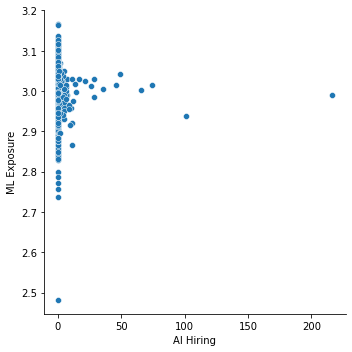

In [9]:
df = rlf #ins
sns.relplot(x='ai_in',y='agg_sml',data=df[df.month=='2021-02'])
plt.xlabel('AI Hiring')
plt.ylabel('ML Exposure')

In [12]:
wba = rl[rl.ticker=='WBA'].sort_values(by='month').copy()

In [5]:
swk = rl[rl.ticker=='SWK'].sort_values(by='month').copy()

Text(0.5, 0, 'Date')

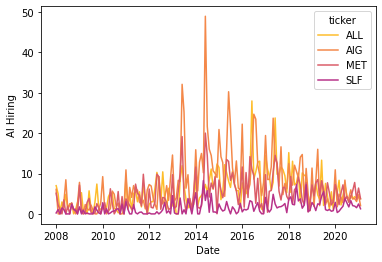

In [63]:
df = ins
sns.set_palette('plasma_r')
yplot = 'ai_in'
sns.lineplot(x='dt',y=yplot, hue='ticker', data=df)
plt.ylabel('AI Hiring')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

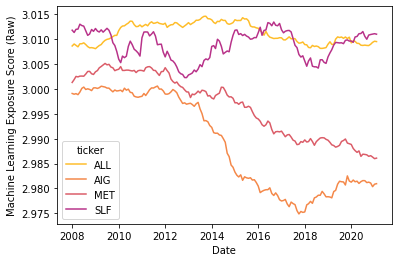

In [16]:
df = ins
yplot = 'agg_sml'
sns.lineplot(x='dt',y=yplot, hue='ticker', data=df)
plt.ylabel('Machine Learning Exposure Score (Raw)')
plt.xlabel('Date')

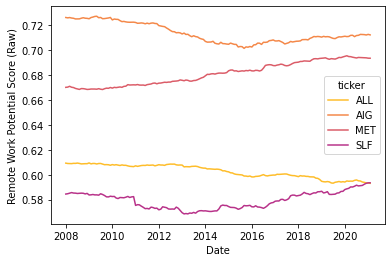

In [18]:
df = ins
yplot = 'agg_tele'
plt.ylabel('Remote Work Potential Score (Raw)')
plt.xlabel('Date')
sns.lineplot(x='dt',y=yplot, hue='ticker', data=df)

In [53]:
rl.sector.unique()

array(['Health Care', 'Real Estate', 'Consumer Staples', 'Industrials',
       'Financials', nan, 'Consumer Discretionary', 'Energy',
       'Information Technology', 'Communication', 'Materials',
       'Utilities'], dtype=object)

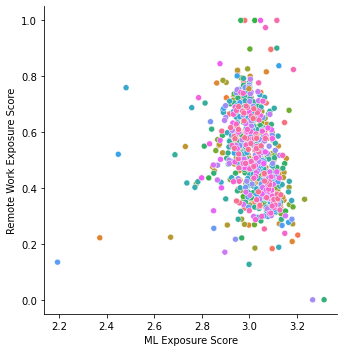

In [20]:
xplot = 'agg_sml'
yplot = 'agg_tele'
df = rlf[rlf.month=='2021-02'] #ins[ins.month=='2021-02'] #ins
g = sns.relplot(x=xplot,y=yplot, hue='ticker', data=df)
plt.xlabel('ML Exposure Score')
plt.ylabel('Remote Work Exposure Score')
g._legend.remove()

In [24]:
rl.sector.unique()

array(['Health Care', 'Real Estate', 'Consumer Staples', 'Industrials',
       'Financials', nan, 'Consumer Discretionary', 'Energy',
       'Information Technology', 'Communication', 'Materials',
       'Utilities'], dtype=object)

In [7]:
df = rl[(rl.month=='2021-02')&(rl.sector.isin(['Consumer Staples'])|(rl.ticker.isin(['CVS','SWK'])))&(rl.exchange.isin(['NYSE','NASDAQ']))].copy()
df.head()

,company,month,ai_sum,ai_in,ai_out,cloud_sum,cloud_in,cloud_out,datascience_sum,datascience_in,...,naics_description,cik,lei,agg_sml,agg_obs,agg_reorg,agg_rcog,agg_rman,agg_tele,dt
17659,Coca-Cola Company,2021-02,202.738680,3.608401,3.705650,2104.581800,38.841614,45.820637,2282.866700,48.065773,...,NaN,NaN,NaN,3.015712,3.697393,4.467298,0.225869,0.141820,0.283480,2021-02-01
30872,Hershey Company,2021-02,15.236424,0.236823,0.250900,213.440770,3.245695,4.785885,345.040860,6.474763,...,NaN,NaN,NaN,2.971077,3.710301,4.428686,0.186452,0.240979,0.303773,2021-02-01
34381,Cal-Maine Foods Inc,2021-02,NaN,NaN,NaN,3.677443,0.003214,0.003338,0.000574,0.000000,...,NaN,NaN,NaN,3.039100,3.657082,4.471625,0.186686,0.711629,0.169393,2021-02-01
38030,Clorox Company,2021-02,14.211436,0.296055,0.224960,274.502040,3.841062,3.955282,415.667100,10.646810,...,NaN,NaN,NaN,2.920084,3.704168,4.395713,0.238999,0.195257,0.358573,2021-02-01
48353,Molson Coors Brewing Company,2021-02,5.657750,0.009355,0.106694,243.730580,0.590265,3.123892,283.584800,0.754924,...,NaN,NaN,NaN,2.886033,3.573266,4.279143,0.201297,0.222495,0.261288,2021-02-01


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


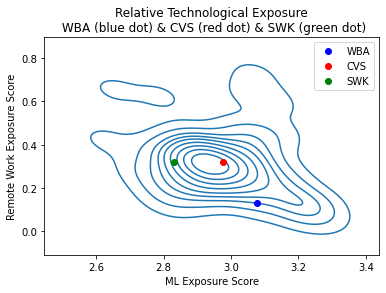

In [9]:
sns.kdeplot(x='agg_sml', y='agg_tele', hue='sector', data=df, legend=False)
plt.plot(df[df.ticker=='WBA'].agg_sml, df[df.ticker=='WBA'].agg_tele, 'bo')
plt.plot(df[df.ticker=='CVS'].agg_sml, df[df.ticker=='CVS'].agg_tele, 'ro')
plt.plot(df[df.ticker=='SWK'].agg_sml, df[df.ticker=='CVS'].agg_tele, 'go')
plt.xlabel('ML Exposure Score')
plt.ylabel('Remote Work Exposure Score')
plt.title('Relative Technological Exposure\n WBA (blue dot) & CVS (red dot) & SWK (green dot)')
plt.legend(['WBA','CVS','SWK'])

In [15]:
amzn = rl[rl.ticker=='AMZN'].sort_values(by='month').copy()
tgt = rl[rl.ticker=='TGT'].sort_values(by='month').copy()
msft = rl[rl.ticker=='MSFT'].sort_values(by='month').copy()
googl = rl[rl.ticker=='GOOGL'].sort_values(by='month').copy()

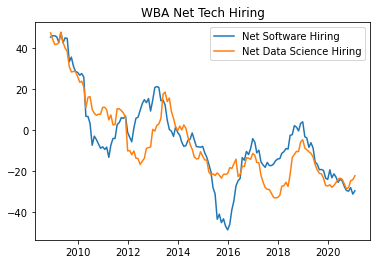

In [55]:
#wba['nethireSW'] = wba.software_in - wba.software_out
plt.plot(wba.dt, (wba.software_in-wba.software_out).rolling(window=12).mean())
plt.plot(wba.dt, (wba.datascience_in-wba.datascience_out).rolling(window=12).mean())
plt.title('WBA Net Tech Hiring')
plt.legend(['Net Software Hiring','Net Data Science Hiring'])

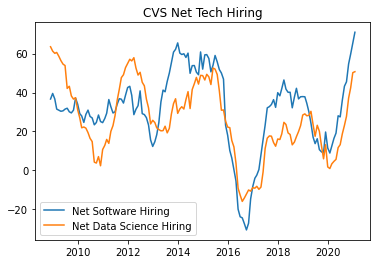

In [59]:
#wba['nethireSW'] = wba.software_in - wba.software_out
cvs = rl[rl.ticker=='CVS'].sort_values(by='month').copy()
plt.plot(cvs.dt, (cvs.software_in-cvs.software_out).rolling(window=12).mean())
plt.plot(cvs.dt, (cvs.datascience_in-cvs.datascience_out).rolling(window=12).mean())
plt.title('CVS Net Tech Hiring')
plt.legend(['Net Software Hiring','Net Data Science Hiring'])

Text(0.5, 1.0, 'WBA Net Cloud Hiring')

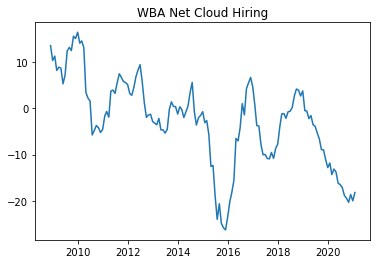

In [77]:
#wba['nethireSW'] = wba.software_in - wba.software_out
plt.plot(wba.dt, (wba.cloud_in-wba.cloud_out).rolling(window=12).mean())
#plt.plot(wba.dt, (wba.datascience_in-wba.datascience_out).rolling(window=12).mean())
plt.title('WBA Net Cloud Hiring')
#plt.legend(['Net Software Hiring','Net Data Science Hiring'])

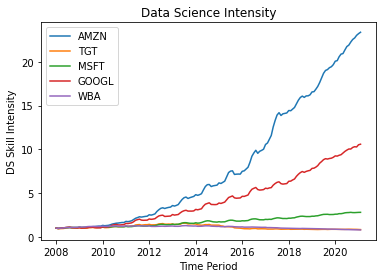

In [16]:
plt.plot(amzn.dt,amzn.datascience_sum/amzn.datascience_sum[428699])
plt.plot(tgt.dt, tgt.datascience_sum/tgt.datascience_sum[11449])
plt.plot(msft.dt, msft.datascience_sum/msft.datascience_sum[756373])
plt.plot(googl.dt, googl.datascience_sum/googl.datascience_sum[343687])
plt.plot(wba.dt, wba.datascience_sum/wba.datascience_sum[11926])
plt.xlabel("Time Period")
plt.ylabel("DS Skill Intensity")
plt.title("Data Science Intensity")
plt.legend(['AMZN','TGT','MSFT','GOOGL','WBA'])
plt.show()

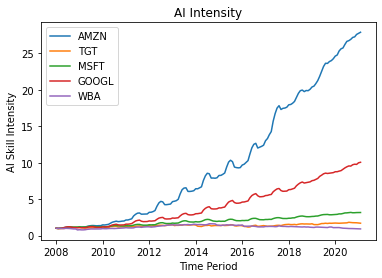

In [17]:
plt.plot(amzn.dt,amzn.ai_sum/amzn.ai_sum[428699])
plt.plot(tgt.dt, tgt.ai_sum/tgt.ai_sum[11449])
plt.plot(msft.dt, msft.ai_sum/msft.ai_sum[756373])
plt.plot(googl.dt, googl.ai_sum/googl.ai_sum[343687])
plt.plot(wba.dt, wba.ai_sum/wba.ai_sum[11926])
plt.xlabel("Time Period")
plt.ylabel("AI Skill Intensity")
plt.title("AI Intensity")
plt.legend(['AMZN','TGT','MSFT','GOOGL','WBA'])
plt.show()

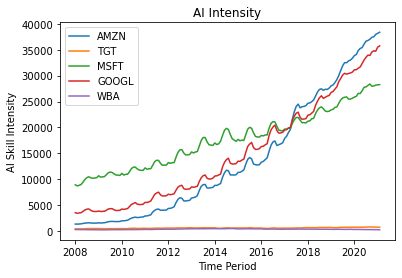

In [18]:
plt.plot(amzn.dt,amzn.ai_sum)
plt.plot(tgt.dt, tgt.ai_sum)
plt.plot(msft.dt, msft.ai_sum)
plt.plot(googl.dt, googl.ai_sum)
plt.plot(wba.dt, wba.ai_sum)
plt.xlabel("Time Period")
plt.ylabel("AI Skill Intensity")
plt.title("AI Intensity")
plt.legend(['AMZN','TGT','MSFT','GOOGL','WBA'])
plt.show()

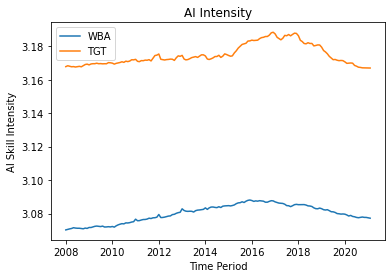

In [23]:
#plt.plot(amzn.dt,amzn.ai_sum)
plt.plot(wba.dt, wba.agg_sml)
plt.plot(tgt.dt, tgt.agg_sml)
#plt.plot(msft.dt, msft.ai_sum)
#plt.plot(googl.dt, googl.ai_sum)
plt.xlabel("Time Period")
plt.ylabel("AI Skill Intensity")
plt.title("AI Intensity")
plt.legend(['WBA','TGT'])
plt.show()

In [20]:
list(wba)

['company',
 'month',
 'ai_sum',
 'ai_in',
 'ai_out',
 'cloud_sum',
 'cloud_in',
 'cloud_out',
 'datascience_sum',
 'datascience_in',
 'datascience_out',
 'datastorage_sum',
 'datastorage_in',
 'datastorage_out',
 'robots_sum',
 'robots_in',
 'robots_out',
 'software_sum',
 'software_in',
 'software_out',
 'name',
 'ticker',
 'exchange',
 'country',
 'sector',
 'sedol',
 'isin',
 'cusip',
 'orb_num',
 'url',
 'industry',
 'naics_code',
 'naics_description',
 'cik',
 'lei',
 'agg_sml',
 'agg_obs',
 'agg_reorg',
 'agg_rcog',
 'agg_rman',
 'agg_tele',
 'dt']

In [43]:
nM = ['KFRC', 'TBI', 'AMN', 'KFY', 'RCMT', 'CCRN', 'ASGN', 'RHI', 'KELYA', 'BGSF', 'NSP', 'BBSI']

In [57]:
kfrc = rl[rl.ticker=='KFRC'].sort_values(by='month').copy()
kfy = rl[rl.ticker=='KFY'].sort_values(by='month').copy()
kelya = rl[rl.ticker=='KELYA'].sort_values(by='month').copy()
bgsf = rl[rl.ticker=='BGSF'].sort_values(by='month').copy()
vie = rl[rl.ticker=='VIE'].sort_values(by='month').copy()

In [48]:
bgsf.head()

,company,month,ai_sum,ai_in,ai_out,cloud_sum,cloud_in,cloud_out,datascience_sum,datascience_in,...,naics_description,cik,lei,agg_sml,agg_obs,agg_reorg,agg_rcog,agg_rman,agg_tele,dt
798274,BG Staffing Inc,2008-01,3.006043,1.602440e-10,6.348612e-04,96.47382,9.774623,11.117169,33.415634,7.397068,...,NaN,NaN,NaN,2.987720,3.708764,4.479051,0.324234,0.162577,0.384397,2008-01-01
87142,BG Staffing Inc,2008-02,3.005409,1.977001e-09,9.533113e-08,88.51954,3.162884,0.010273,29.956402,1.352406,...,NaN,NaN,NaN,2.982052,3.698034,4.468745,0.320359,0.175876,0.381541,2008-02-01
625398,BG Staffing Inc,2008-03,3.005409,3.433779e-09,1.195817e-08,91.62033,3.111064,5.142677,29.952848,0.000018,...,NaN,NaN,NaN,2.981702,3.700200,4.468162,0.312689,0.168233,0.384631,2008-03-01
260816,BG Staffing Inc,2008-04,3.005408,1.521299e-09,1.079280e-08,86.71204,0.234389,2.433186,29.487755,1.683159,...,NaN,NaN,NaN,2.983397,3.700695,4.469310,0.311923,0.164561,0.385034,2008-04-01
367965,BG Staffing Inc,2008-05,3.005408,1.850034e-09,5.323697e-09,85.84531,1.566453,4.920126,28.140352,0.002272,...,NaN,NaN,NaN,2.984238,3.701743,4.469939,0.314872,0.165102,0.387660,2008-05-01


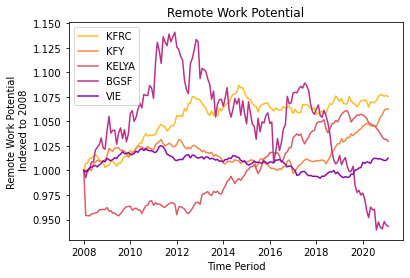

In [59]:
plt.plot(kfrc.dt,kfrc.agg_tele/kfrc.agg_tele[142379])
plt.plot(kfy.dt, kfy.agg_tele/kfy.agg_tele[495575])
plt.plot(kelya.dt, kelya.agg_tele/kelya.agg_tele[414933])
plt.plot(bgsf.dt, bgsf.agg_tele/bgsf.agg_tele[798274])
plt.plot(vie.dt, vie.agg_tele/vie.agg_tele[854822])
plt.xlabel("Time Period")
plt.ylabel("Remote Work Potential\n Indexed to 2008")
plt.title("Remote Work Potential")
plt.legend(['KFRC','KFY','KELYA','BGSF','VIE'])
plt.show()

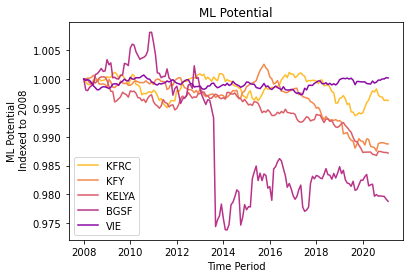

In [60]:
plt.plot(kfrc.dt,kfrc.agg_sml/kfrc.agg_sml[142379])
plt.plot(kfy.dt, kfy.agg_sml/kfy.agg_sml[495575])
plt.plot(kelya.dt, kelya.agg_sml/kelya.agg_sml[414933])
plt.plot(bgsf.dt, bgsf.agg_sml/bgsf.agg_sml[798274])
plt.plot(vie.dt, vie.agg_sml/vie.agg_sml[854822])
plt.xlabel("Time Period")
plt.ylabel("ML Potential\n Indexed to 2008")
plt.title("ML Potential")
plt.legend(['KFRC','KFY','KELYA','BGSF','VIE'])
plt.show()

## Academic Progress in Pipeline

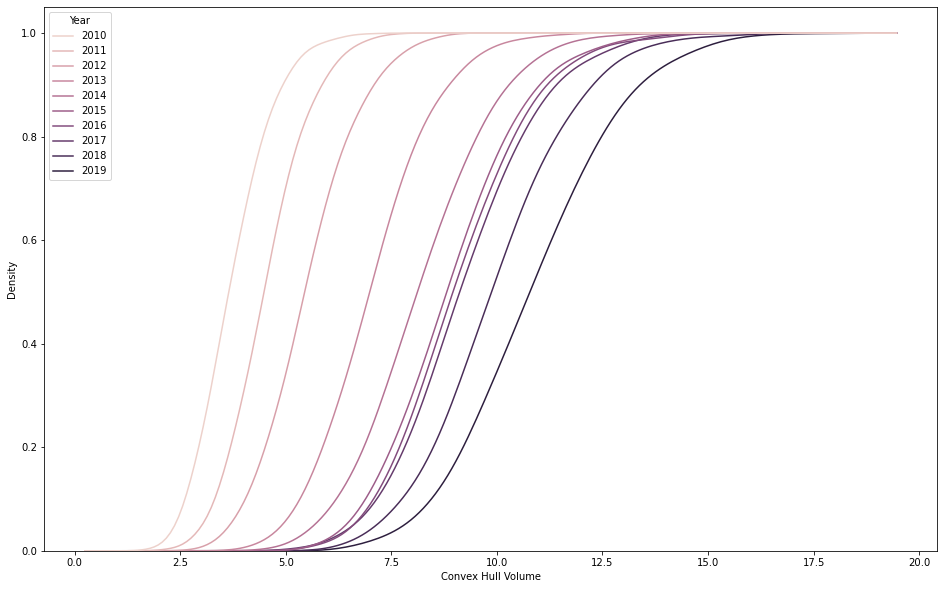

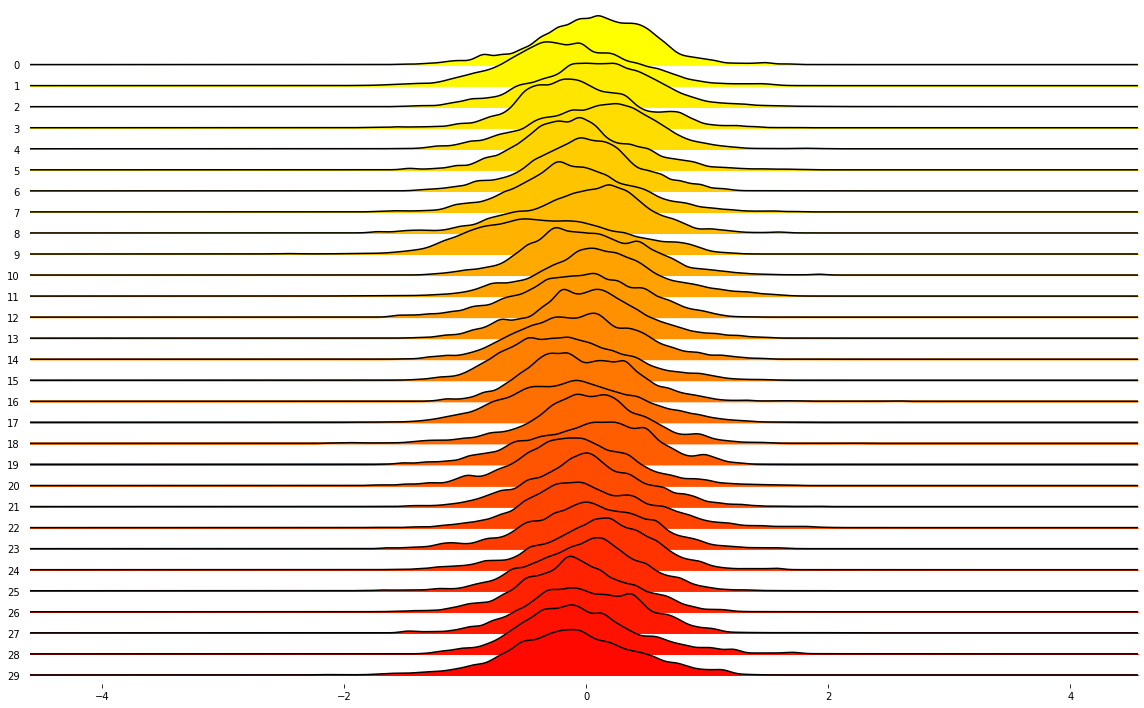

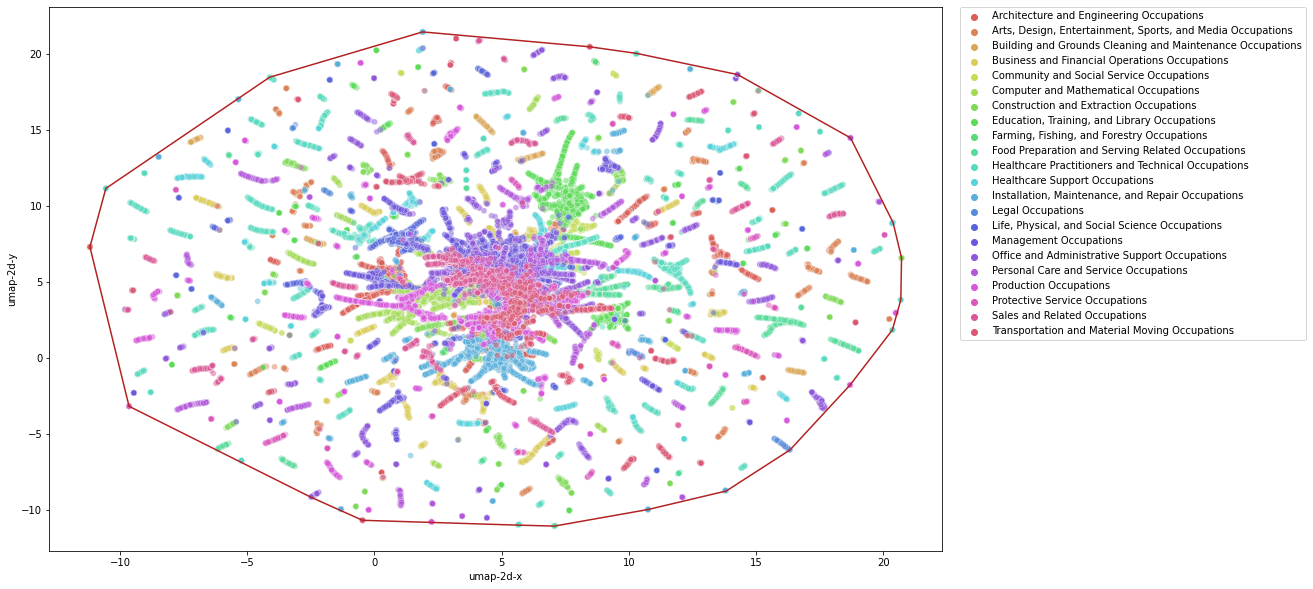